In [69]:
from ultralytics import YOLO

from IPython.display import display, Image

In [70]:
import cv2
import numpy as np
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator  # ultralytics.yolo.utils.plotting is deprecated

# Load the pretrained YOLO model
model = YOLO('best_test1.pt')

# Define the path to the image file
img = 'Pictures Folder\WhatsApp Image 2023-12-06 at 15.18.58 (1).jpeg'
cv2_image = cv2.imread(img)
# Run inference on the image
results = model(img)




image 1/1 c:\Users\lucas\Desktop\lol\Pictures Folder\WhatsApp Image 2023-12-06 at 15.18.58 (1).jpeg: 640x480 1 damaged, 6 normals, 171.1ms
Speed: 2.0ms preprocess, 171.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


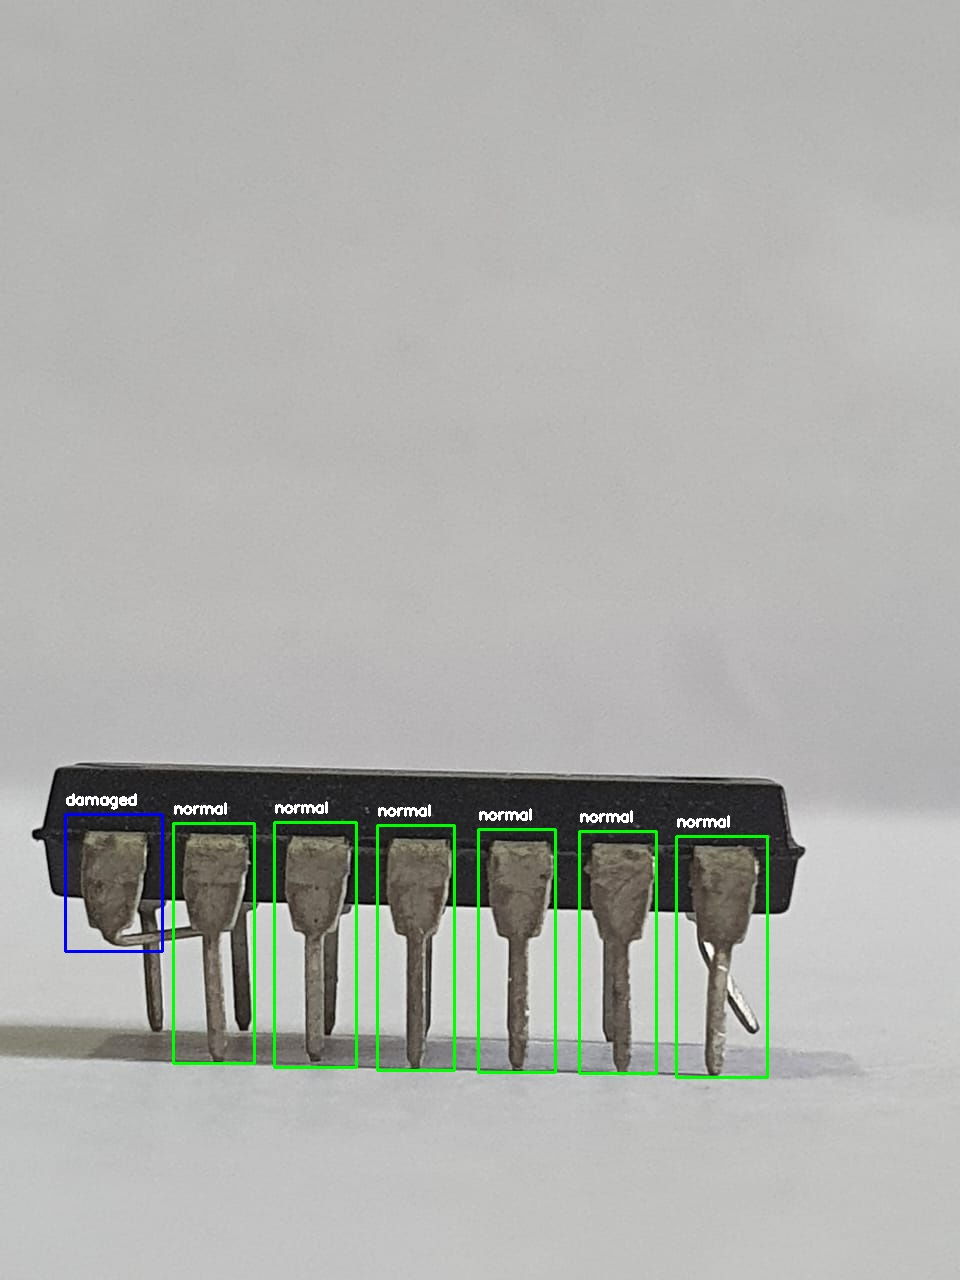

In [71]:
color_dict = {
    "damaged" : (255,0,0),
    "normal"  : (0,255,0),
    "bent"    : (0,0, 255)
}

data_dict = {
    "damaged" : 0,
    "normal"  : 0,
    "bent"    : 0
}

# Font settings
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (255, 255, 255)  # White color for the text
line_type = 2

for r in results:

    boxes = r.boxes
    class_names = r.names

    for box in boxes:
        
        b = box.xyxy[0].tolist()   # get box coordinates in (top, left, bottom, right) format
        c = box.cls
        conf = box.conf

        # Convert class label to an integer
        class_label = int(c.item())

        class_name = class_names[class_label]

        start_point = (int(b[0]), int(b[1]))  # Top left corner
        end_point = (int(b[2]), int(b[3]))    # Bottom right corner

        # Color of the rectangle (B, G, R)
        color = color_dict[class_name]  # Green color

        # Line thickness of the rectangle. If you set it to -1, it will fill the rectangle
        thickness = 2

        # Draw the rectangle on the image
        cv2.rectangle(cv2_image, start_point, end_point, color, thickness)

        # Coordinates for the label (typically just above or inside the top-left corner of the rectangle)
        label_position = (start_point[0], start_point[1] - 10 if start_point[1] - 10 > 10 else start_point[1] + 20)

        # Put the text on the image
        cv2.putText(cv2_image, class_name, label_position, font, font_scale, font_color, line_type)



# Display the image
cv2.imwrite('output_image.jpg', cv2_image)
display(Image(filename='output_image.jpg'))

